<a href="https://colab.research.google.com/github/mohitsharmas97/Deep_learning_notebooks/blob/main/houseprediction_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/housesalesprediction


In [ ]:
cd /root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1


/root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1


In [ ]:
ls

kc_house_data.csv


In [ ]:
dataset=pd.read_csv("kc_house_data.csv")
dataset.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [ ]:
dataset.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month
dataset['day'] = dataset['date'].dt.day
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [ ]:
def select_columns(df, columns_to_keep):
  """
  Selects specified columns from a pandas DataFrame.

  Args:
    df: The input pandas DataFrame.
    columns_to_keep: A list of column names to keep.

  Returns:
    A new DataFrame with only the specified columns.
  """
  return df[columns_to_keep]

# Example usage with the columns you specified:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
           'waterfront', 'view', 'condition', 'grade', 'sqft_above',
           'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
           'long', 'sqft_living15', 'sqft_lot15','price']

dataset_selected = select_columns(dataset, columns)
display(dataset_selected.head())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [ ]:
input_data = dataset_selected.drop('price', axis=1)
output_data = dataset_selected['price']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
input_data=pd.DataFrame(scaler.fit_transform(input_data), columns=input_data.columns)

In [ ]:
input_data.head(3)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375


In [ ]:
input_data.shape

(21613, 18)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(17290, 18)

In [ ]:
import tensorflow
from keras.layers import Dense
from keras.models import Sequential


In [ ]:
ann = Sequential([
    Dense(units=32, input_dim=18, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=1,activation='linear')  # ⚠️ Output layer - good, but may lack context
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann.compile(
    optimizer='adam',
    loss='mean_squared_error',  # or 'mae'
    metrics=['mae']  # accuracy is invalid for regression
)


In [ ]:
ann.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test), verbose=1)

Epoch 1/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 193975238656.0000 - mae: 295908.0938 - val_loss: 39870181376.0000 - val_mae: 122782.9844
Epoch 2/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 34818084864.0000 - mae: 120162.3594 - val_loss: 37351600128.0000 - val_mae: 115860.1328
Epoch 3/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 31630917632.0000 - mae: 112957.1875 - val_loss: 34448449536.0000 - val_mae: 111801.4141
Epoch 4/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 32345161728.0000 - mae: 113193.9609 - val_loss: 32626126848.0000 - val_mae: 107487.7891
Epoch 5/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 26717472768.0000 - mae: 103176.3125 - val_loss: 31153926144.0000 - val_mae: 107561.7812
Epoch 6/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 24258054144.0000 - mae: 98181.2891 - val_loss: 28189077504.0000 - val_mae: 97557.3594
Epoch 7/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22377926656.0000 - mae: 94174.1953 - val_loss: 295490

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Get predictions on the test set
y_pred = ann.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
R2 Score: 0.8871066398086488
Mean Absolute Error (MAE): 73170.06263734675


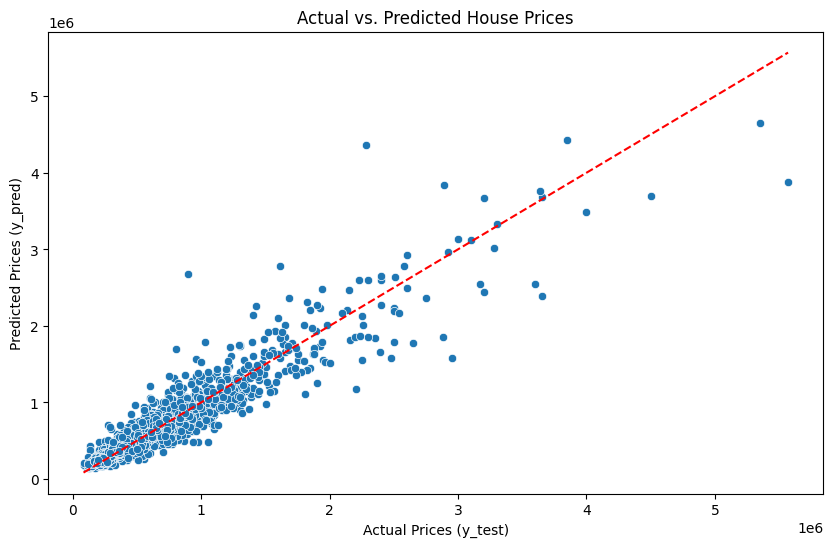

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten())
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred)")
plt.title("Actual vs. Predicted House Prices")
plt.show()